# **Trabajo práctico 2**
**Descomposición de matrices en valores singulares**
---------
**1er cuatrimestre 2023 - Álgebra Lineal Computacional**


Grupo "Quiénes son?"

Integrantes:
*   Dafne Yudcovsky (dafneyudcovsky@gmail.com)
*   Guadalupe Maldonado (guada.rocio@gmail.com)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Líneas para leer los CSV, si están guardados en la misma carpeta que el Notebook
train = pd.read_csv("mnist_train.csv", header=None)
test = pd.read_csv("mnist_test.csv", header=None)

FileNotFoundError: [Errno 2] No such file or directory: 'mnist_train.csv'

### Ejercicio 1

**(a)** Realizar una función en *python* que dado los datos de las imágenes de entrenamiento y una fila, grafique la imagen guardada en esa fila y en el título del gráfico se indique a qué número corresponde, es decir su clasificación. Usar la función `imshow()` de *pyplot*.

In [3]:
def de_fila_a_matriz(fila):
  #toma una fila, le saca el primer elemento, lo convierte en 2D array
  #fila es un array de longitud 785
  pixeles = fila.iloc[1:785]
  imagen = np.array(pixeles).reshape((28,28))
  return imagen

def imshow_desde_fila(datos, nro_fila):
  fila = datos.iloc[nro_fila]
  imagen = de_fila_a_matriz(fila)
  plt.imshow(imagen, cmap='gray') #muestra en grayscale
  clase = datos.iloc[nro_fila, 0]
  plt.title('Clasificación: '+str(clase))
  return

#Test
print(imshow_desde_fila(train, 0))

NameError: name 'train' is not defined

**(b)** ¿Cuántas imágenes hay por cada dígito en el conjunto de entrenamiento? ¿Y en el conjunto
de testeo?

In [ ]:
#Para poder responder la pregunta, primero armamos un contador
def contar(datos):
  counter = np.zeros(10) #La posición i cuenta la #apariciones de i
  for i in range(len(datos)):
    value = datos.iloc[i, 0]
    counter[value] +=1
  return counter

print('Train:')
print(contar(train))
print('Test:')
print(contar(test))

Train:
[3483. 4069. 3502. 3647. 3467. 3198. 3522. 3682. 3435. 3585.]
Test:
[ 980. 1135. 1032. 1010.  982.  892.  958. 1028.  974. 1009.]


> **RTA:** En el conjunto de entrenamiento hay 5923 ceros, 6742 unos, 5958 dos, 6131 tres, 5842 cuatros, 5421 cincos, 5918 seis, 6265 sietes, 5851 ochos, y 5949 nueves.

> En el conjunto de testeo hay 980 ceros, 1135 unos, 1032 dos, 1010 tres, 982 cuatros, 892 cincos, 958 seis, 1028 sietes, 974 ochos, y 1009 nueves.

**(c)** Para las primeras 2.000 imágenes del conjunto de entrenamiento, realizar una función en python que devuelva la imagen promedio de cada uno de los dígitos.

In [ ]:
def armar_dict_posiciones(datos):
  #crear el diccionario
  dict_posiciones = {
      0 : np.full(2000, False) #el value es un array de 2000 elementos, todos False
  }
  for i in range(1, 10):
    dict_posiciones[i] = np.full(2000, False)

  #llenar el diccionario con las posiciones
  #si un key A esta en la fila j, la posicion j del value de A cambia a True
  for i in range(2000):
    clase = datos.iloc[i, 0]
    temp = dict_posiciones[clase]
    temp[i] = True
    dict_posiciones[clase] = temp

  return dict_posiciones

def hallar_imagen_promedio(datos, posiciones):
  #toma el value del dict_posiciones de un sólo dígito
  #devuelve la imagen promedio de ese dígito como 2D array
  suma = np.zeros((28, 28))
  count = 0
  for i in range(len(posiciones)):
    if (posiciones[i] == True):
      fila = datos.iloc[i]
      imagen = de_fila_a_matriz(fila)
      suma = suma + imagen
      count = count + 1
  suma = np.divide(suma, count)
  return suma

def todas_las_imagenes_promedio(datos):
  #halla la imagen promedio para cada uno de los diez digitos
  #devuelve una lista de las 10 imagenes promedio en forma de 2D array
  dict_posiciones = armar_dict_posiciones(datos)

  cero = hallar_imagen_promedio(datos, dict_posiciones[0])
  uno = hallar_imagen_promedio(datos, dict_posiciones[1])
  dos = hallar_imagen_promedio(datos, dict_posiciones[2])
  tres = hallar_imagen_promedio(datos, dict_posiciones[3])
  cuatro = hallar_imagen_promedio(datos, dict_posiciones[4])
  cinco = hallar_imagen_promedio(datos, dict_posiciones[5])
  seis = hallar_imagen_promedio(datos, dict_posiciones[6])
  siete = hallar_imagen_promedio(datos, dict_posiciones[7])
  ocho = hallar_imagen_promedio(datos, dict_posiciones[8])
  nueve = hallar_imagen_promedio(datos, dict_posiciones[9])

  return cero,uno,dos,tres,cuatro,cinco,seis,siete,ocho,nueve

**(d)** Graficar cada una de las imágenes promedio obtenidas.

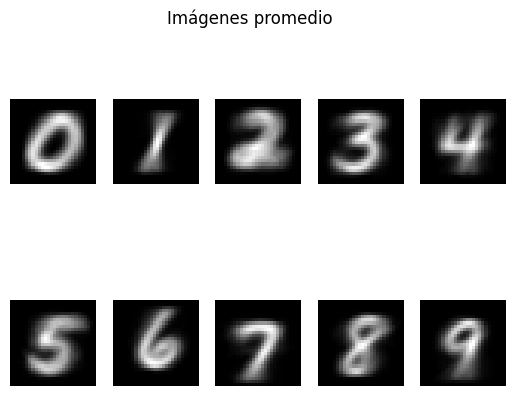

In [ ]:
promedios = todas_las_imagenes_promedio(train)

fig, ax = plt.subplots(2, 5)

plt.subplot(2, 5, 1)
plt.axis('off')
plt.imshow(promedios[0], cmap='gray')

plt.subplot(2, 5, 2)
plt.axis('off')
plt.imshow(promedios[1], cmap='gray')

plt.subplot(2, 5, 3)
plt.axis('off')
plt.imshow(promedios[2], cmap='gray')

plt.subplot(2, 5, 4)
plt.axis('off')
plt.imshow(promedios[3], cmap='gray')

plt.subplot(2, 5, 5)
plt.axis('off')
plt.imshow(promedios[4], cmap='gray')

plt.subplot(2, 5, 6)
plt.axis('off')
plt.imshow(promedios[5], cmap='gray')

plt.subplot(2, 5, 7)
plt.axis('off')
plt.imshow(promedios[6], cmap='gray')

plt.subplot(2, 5, 8)
plt.axis('off')
plt.imshow(promedios[7], cmap='gray')

plt.subplot(2, 5, 9)
plt.axis('off')
plt.imshow(promedios[8], cmap='gray')

plt.subplot(2,5,10)
plt.axis('off')
plt.suptitle('Imágenes promedio')
plt.imshow(promedios[9], cmap='gray')

### Ejercicio 2

**(a)** Realizar una función en Python que dadas las imágenes promedio del ejercicio 1(c), calcule la menor distancia Euclídea entre todos los dígitos y cada una de las primeras 200 imágenes de
testeo. La función debe devolver un arreglo con las 200 predicciones.

In [ ]:
test200 = test.head(200) #las primeras 200 imágenes

def distancias_euclideas(img_test, promedios):
  distancias = []  #va a tener la distancia a cada imagen promedio para img_test
  for j in range(len(promedios)):
    img_promedio = promedios[j]
    dist = np.linalg.norm(img_test - img_promedio)
    distancias.append(dist)
  return distancias

def hallar_predicciones(test, promedios):
  #devuelve un array donde la posicion i tiene la prediccion de la imagen de la fila i
  predicciones = []

  for i in range(len(test)):
    fila_test = test.iloc[i]
    img_test = de_fila_a_matriz(fila_test)
    distancias = distancias_euclideas(img_test, promedios)

    prediccion = np.argmin(distancias)  #el indice de la distancia minima, aka la prediccion
    predicciones.append(prediccion)

  return predicciones

**(b)** Realizar una función en Python que tome el arreglo de predicciones anteriores y evalúe si es correcta o no la predicción. Debe devolver la precisión en la predicción. Se define la precisión como: $Precisión = \Sigma(CasosAcierto) / \Sigma(CasosTotales)$

In [ ]:
def precision(test, predicciones):
  #devuelve un int: la precisión del modelo
  expected = np.array(test.iloc[:, 0])
  aciertos = 0
  for i in range(200):  #200=len(predicciones)=len(correctas)
    if (predicciones[i]==expected[i]):
      aciertos = aciertos + 1

  precision = aciertos / 200
  return precision

promedios = todas_las_imagenes_promedio(train)
predicciones = hallar_predicciones(test200, promedios)
print('Precisión: ' + str(precision(test200, predicciones)))

Precisión: 0.77


**(c)** Graficar un par de casos de imágenes de testeo en los cuales no se haya acertado. ¿Considera buena la precisión?

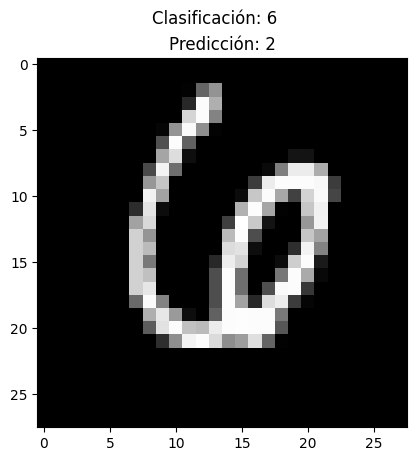

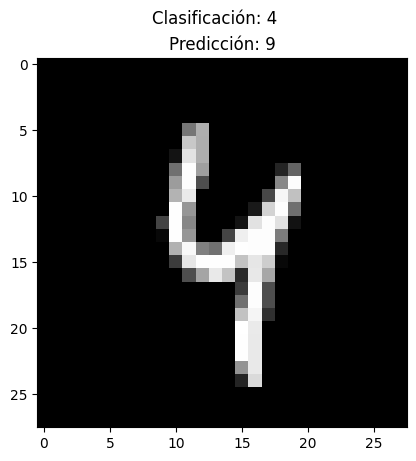

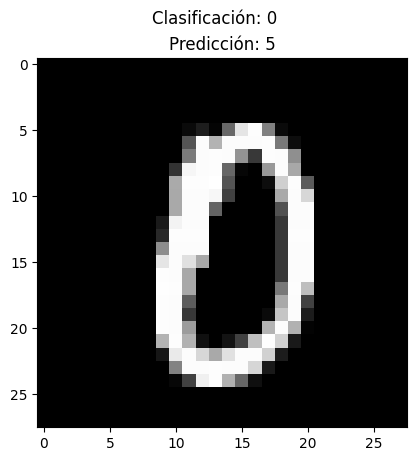

None


In [ ]:
def hallar_desaciertos(test, predicciones):
  #devuelve un array con las posiciones de las predicciones erradas
  expected = np.array(test.iloc[:, 0])
  desaciertos = []
  for i in range(200):
    if (predicciones[i]!=expected[i]):
      desaciertos.append(i)
  return desaciertos

def graficar_desaciertos(test, predicciones, cant_graficos):
  #grafica tantos gráficos de casos errados como cant_graficos indique, eligiendolos al azar
  desaciertos = hallar_desaciertos(test, predicciones)

  for j in range(cant_graficos):
    index = np.random.choice(desaciertos)  #elige un caso errado al azar
    clasificacion = test.iloc[index, 0]
    prediccion = predicciones[index]

    imagen = de_fila_a_matriz(test.iloc[index])
    plt.imshow(imagen, cmap = 'gray')
    plt.suptitle('Clasificación: '+str(clasificacion))
    plt.title('Predicción: '+str(prediccion))
    plt.show()
    plt.close
  return

print(graficar_desaciertos(test200, predicciones, 3))

> **RTA:** Consideramos que la precisión es buena. El resultado al aplicar la función ```precision``` sobre las predicciones de la distancia euclídea es 0,77, es decir, el 77% de las predicciones fueron acertadas. Este modelo es bueno, porque acierta la mayoría de las veces.

> Sin embargo, es muy mejorable. Del dataset de testeo original, que tiene 10000 imágenes, errar alrededor del 23% de los casos implica más de 2000 imágenes cuyas predicciones fueron erróneas.



### Ejercicio 3

Implemetar una función en Python que, dada una matriz $A$, halle la descomposición SVD de $A$, por el método de la potencia.

Llamamos descomposición SVD en valores singulares a: $A = U \Sigma {V}^{t}$, donde $U$ es una matriz ortogonal, $\Sigma$ es una matriz diagonal con la raíz de los autovalores de ${A}^{t} A$ en la
diagonal, y $V$ contiene a los autovectores singulares en sus columnas.

El método de la potencia utiliza el siguiente resultado para asegurar la convergencia:
$B = {A}^{t} A = (U \Sigma {V}^{t})^{t} ⋅ (U \Sigma {V}^{t}) = V ⋅ ({\Sigma}^{t} \Sigma) ⋅ {V}^{t}$




In [ ]:
def construir_B(A):
  aux = np.transpose(A)
  B = np.matmul(aux,A)
  return (B)

#Gracias Silvina por tu ayuda con estoo

def conseguir_autovector_i(B):
  x_random = np.random.rand(len(B[0])) #vector aleatorio
  x = (x_random)/np.linalg.norm(x_random) #vector aleatorio normalizado

  x_next_temp = B @ x
  x_next = x_next_temp/np.linalg.norm(x_next_temp)
  error = 0.1

  while(error < 1 - 1.0e-15):
    x = x_next #Xk ahora es el anterior Xk+1
    x_next_temp = B @ x
    x_next = x_next_temp/np.linalg.norm(x_next_temp)
    error = abs(np.dot(x, x_next))

  return x_next

def descomposicion_SVD(A):
  m = len(A)
  n = len(A[0])  #así A es m x n
  U = np.zeros((m, n))
  V = np.zeros((n, n))
  Sigma = np.zeros((n, n))

  for i in range(n):
    B = construir_B(A)
    v_i = conseguir_autovector_i(B)
    for j in range(len(V)):
      V[j][i] = v_i[j]

    sigma_i = np.linalg.norm(A@v_i)
    Sigma[i][i] = sigma_i

    u_i = (A@v_i)/np.linalg.norm(A@v_i)

    for j in range(len(U)):
      U[j][i] = u_i[j]

    A = A - (sigma_i*(np.outer(u_i, v_i)))

  return U, Sigma, V

### Ejercicio 4

**(a)** Tomar las primeras 2.000 imágenes del conjunto de imágenes de entrenamiento y ordenarlas según el
dígito al que corresponde de 0 a 9. Obtener 10 matrices correspondientes a cada dígito. Estas
matrices deben tener una dimensión de 785 × cantidad imágenes, puede no haber la misma
cantidad de imágenes para cada dígito en las primeras 2.000 imágenes. Recordar que la primer
columna es la clasificación.

Finalmente obtener ${M}_{i=0,...,9}$ matrices de 784 × cantidad imágenes
quitando la primer columna. Se pueden guardar las matrices en un arreglo de tipo lista donde
cada ítem de la lista se corresponde con una matriz Mi y la posición hace referencia al dígito
que representan.

In [ ]:
#tomar las primeras 2000 imágenes y ordenarlas
train2000 = train.head(2000)
train2000 = train2000.sort_values(train2000.columns[0]) #default ascending

#Armar los df con todas las filas de cada clase
cantidades = contar(train2000) #va a tener en la posición n la cantidad de elementos de clase n

limite_ceros = int(cantidades[0])
df_ceros2000 = train2000.iloc[0:limite_ceros]
ceros2000 = np.array(df_ceros2000)

limite_unos = limite_ceros + int(cantidades[1])
df_unos2000 = train2000.iloc[limite_ceros:limite_unos]
unos2000 = np.array(df_unos2000)

limite_dos = limite_unos + int(cantidades[2])
df_dos2000 = train2000.iloc[limite_unos:limite_dos]
dos2000 = np.array(df_dos2000)

limite_tres = limite_dos + int(cantidades[3])
df_tres2000 = train2000.iloc[limite_dos:limite_tres]
tres2000 = np.array(df_tres2000)

limite_cuatros = limite_tres + int(cantidades[4])
df_cuatros2000 = train2000.iloc[limite_tres:limite_cuatros]
cuatros2000 = np.array(df_cuatros2000)

limite_cincos = limite_cuatros + int(cantidades[5])
df_cincos2000 = train2000.iloc[limite_cuatros:limite_cincos]
cincos2000 = np.array(df_cincos2000)

limite_seis = limite_cincos + int(cantidades[6])
df_seis2000 = train2000.iloc[limite_cincos:limite_seis]
seis2000 = np.array(df_seis2000)

limite_sietes = limite_seis + int(cantidades[7])
df_sietes2000 = train2000.iloc[limite_seis:limite_sietes]
sietes2000 = np.array(df_sietes2000)

limite_ochos = limite_sietes + int(cantidades[8])
df_ochos2000 = train2000.iloc[limite_sietes:limite_ochos]
ochos2000 = np.array(df_ochos2000)

limite_nueves = limite_ochos + int(cantidades[9])
df_nueves2000 = train2000.iloc[limite_ochos:limite_nueves]
nueves2000 = np.array(df_nueves2000)

#Armar las Mi
def armar_Mi(datos):
  #datos es un df con las imagenes de un solo digito
  out = []
  for j in range(len(datos)):
    fila_j = datos[j][1:]
    out.append(fila_j)

  out_t = np.transpose(out)  #para que Mi tenga dimensión 784xcant. imágenes, y no al revés
  return np.array(out_t)

def todas_las_Mi():
  M0 = armar_Mi(ceros2000)
  M1 = armar_Mi(unos2000)
  M2 = armar_Mi(dos2000)
  M3 = armar_Mi(tres2000)
  M4 = armar_Mi(cuatros2000)
  M5 = armar_Mi(cincos2000)
  M6 = armar_Mi(seis2000)
  M7 = armar_Mi(sietes2000)
  M8 = armar_Mi(ochos2000)
  M9 = armar_Mi(nueves2000)

  return M0,M1,M2,M3,M4,M5,M6,M7,M8,M9

todas_Mis = todas_las_Mi()

**(b)** Realizar la descomposición SVD de cada una de las matrices ${M}_{i}$ utilizando la función creada
en el ejercicio 3. Para ello realizar una función en Python que tome la lista de matrices ${M}_{i}$
y devuelva en 3 listas la solución de la descomposición, es decir ${U}_{i}$, ${Σ}_{i}$ y ${V}_{i}$.

In [ ]:
def descomponer_todas(todas_Mis):
  todas_Ui = []
  todas_Sigmai = []
  todas_Vi = []

  for i in range(len(todas_Mis)):
    SVD = descomposicion_SVD(todas_Mis[i])

    todas_Ui.append(SVD[0])
    todas_Sigmai.append(SVD[1])
    todas_Vi.append(SVD[2])

  return todas_Ui, todas_Sigmai, todas_Vi

todas_Ui, todas_Sigmai, todas_Vi = descomponer_todas(todas_Mis)

**(c)** Las columnas de ${U}_{i}$ son combinación lineal del espacio columna de ${M}_{i}$. Teniendo esto presente, tomar la primer columna de cada ${U}_{i}$ y graficarla como imagen, es decir, convertir a una matriz de 28×28 y graficar. Explique qué representa.

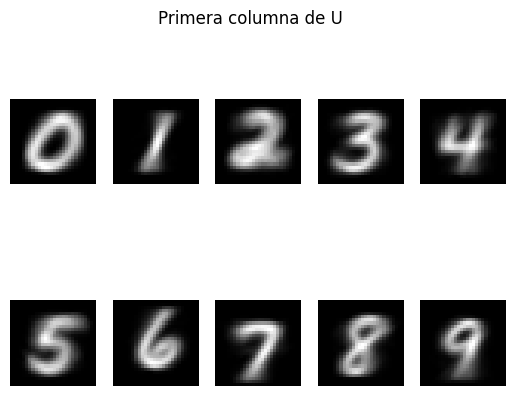

In [ ]:
def tomar_primera_columna(U):
  columna = []
  for i in range (len(U)):
    columna.append(U[i][0])
  return columna

def graficar_columna_0(todas_Ui):
  for i in range(len(todas_Ui)):
    #tomar la columna
    primera_columna = tomar_primera_columna(todas_Ui[i])
    imagen = np.reshape(primera_columna, (28, 28))

    #graficar
    plt.subplot(2, 5, i+1)
    plt.imshow(imagen, cmap='gray')
    plt.axis('off')

  plt.suptitle('Primera columna de U')
  plt.show()
  plt.close()

grafico_primera_columna = graficar_columna_0(todas_Ui)

**(d)** Repetir el ítem anterior pero para las columnas 2 y 3 de cada una de las ${U}_{i}$. Comparar con lo
obtenido en **(c)** y explicar las diferencias.

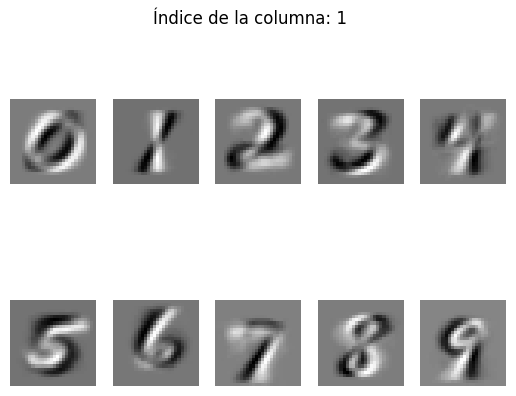

---


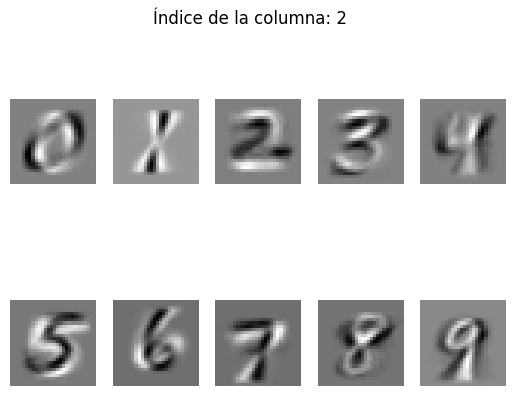

In [ ]:
#análogo a graficar_columna_0, una version gral

def tomar_columna_j(U, j):
  columna = []
  for i in range (len(U)):
    columna.append(U[i][j])

  return columna

def graficar_columna_j(todas_Ui, j):  #grafica la columna j
  for i in range(len(todas_Ui)):
    #tomar la columna
    columna_j = tomar_columna_j(todas_Ui[i], j)
    imagen = np.reshape(columna_j, (28, 28))

    #graficar
    plt.subplot(2, 5, i+1)
    plt.imshow(imagen, cmap='gray')
    plt.axis('off')

  plt.suptitle('Índice de la columna: ' + str(j))
  plt.show()
  plt.close()

grafico_segunda_columna = graficar_columna_j(todas_Ui, 1)
print('---')
grafico_tercera_columna = graficar_columna_j(todas_Ui, 2)

> **RTA:** En la descomposición en valores singulares de una matriz dada a la que llamaremos $A \in {R}^{mxn}$ obtenemos: una matriz $U \in {R}^{mxm}$ ortogonal, una $\Sigma \in {R}^{mxn}$ con los valores singulares de $A$ en la diagonal ordenados de forma decreciente y ceros en el resto, y una matriz $V \in {R}^{nxn}$ ortogonal. La propiedad que nos importa en este caso es que cualquier columna de $A$ puede ser expresada como una combinación lineal de las columnas de $U$, por lo que se puede generar todo el espacio de $A$ a través de $U$.

> A la hora de graficar la primera columna de cada ${U}_{i}$, las imágenes que obtenemos son muy parecidas a las imágenes promedio de cada dígito (ejercicio 1c). Sin embargo, si se grafican la segunda o tercera columna, el resultado no es tan claro - es más difícil distinguir de qué dígito se trata, y los colores son menos extremos (es decir, hay mayor presencia de grises).

> Mirando un poco la SVD, podemos pensar por qué pasa esto.
Al reconstruir una matriz a partir de su descomposición SVD; la matriz $\Sigma$ es multiplicada por la izquierda por $U$, es decir, la columna fila de $U$ se multiplica por el primer valor singular. Como  $\Sigma$ cuenta con los valores singulares ordenados decrecientemente, tenemos que la primera columna de $U$ será multiplicada por el mayor valor singular. Es decir, la primera columna de U es la que lleva el mayor peso en la reconstrucción de la matriz - o, lo que es lo mismo, la que contiene la mayor parte de la información de la matriz que se descompuso.

> Esto implicaría que esa columna es la de mayor relevancia para graficar la imagen correctamente. Asimismo, a medida que tomamos columnas de mayor índice, éstas son multiplicadas por valores singulares cada vez más chicos, es decir, aportan menos información sobre la matriz descompuesta - y se parecen menos a las imágenes oirignales.

(e) [Consiga completa en la guía]

La función de Python debe tomar como entrada las matrices ${U}_{i}$ obtenidas a partir de las primeras
2.000 imágenes del conjunto de entrenamiento (ya calculadas en el ejercicio 3), junto con las 200
primeras imágenes de testeo, y devolver la precisión (como se calculó en el ejercicio 2(b)), para cada
valor de aproximación en rango $k$. Es decir, se obtendrán 5 valores distintos de acuerdo a los valores
de $k$ utilizados.

In [ ]:
def i_menor_residuo(todas_Ui, vector_img, k):
  #halla los residuos de cada Ui y devuelve el valor de i que tiene el menor residuo
  residuos = []

  for j in range(10):
    U = todas_Ui[j][:, :k]
    residuo = vector_img - (U @ np.transpose(U) @ vector_img)
    residuos.append(np.linalg.norm(residuo))
  residuo_min = np.argmin(residuos)

  return residuo_min

def precisiones_Uk(todas_Ui, test):
  precisiones = []

  for k in range(1, 6):  #k de 1 a 5
    aciertos = 0
    for i in range(len(test)):
      vector_img = test.iloc[i, 1:]
      expected = test.iloc[i, 0]
      predicted = i_menor_residuo(todas_Ui, vector_img, k)
      if expected == predicted:
        aciertos += 1
    precision = aciertos / len(test)
    precisiones.append(precision)

  return precisiones

precisiones = precisiones_Uk(todas_Ui, test200)
print('Precisiones: '+str(precisiones))

Precisiones: [0.77, 0.87, 0.92, 0.945, 0.945]


### Ejercicio 5



Finalmente comparar los resultados obtenidos para la precisión entre los ejercicios 2 y 4. ¿Qué puede
observar? Graficar y comentar aquellos casos en los cuales la predicción falló en el ejercicio 4 para
distintos $k$. Por ejemplo, algún caso en el que la predicción haya fallado con algún $k$ y luego con otro
$k$ haya sido exitosa.

> **RTA:** En general, la precisión del modelo del ejercicio 4 es igual o mejor que la del modelo del ejercicio 2. En el caso de $k=1$, es decir, en el que se tomara sólo una columna de U, la precición es la misma (77%). Esto tiene sentido con lo dicho anteriormente: la primera columna de $U$ contiene la mayor parte de la información. Además, si se compara las imágenes promedio con las imágenes extraídas de la primera columna de $U$, se ve que son parecidas. El modelo de distancia euclídea compara las imágenes de test con las imágenes promedio, y por eso no sorprende que su precisión sea parecida a la del modelo de residuo con $k=1$.

> También puede verse que la precisión del modelo de residuo aumenta a medida que se consideran más columnas de $U$. El modelo con $k=5$ acierta el 94,5% de los casos. Esto tiene sentido con lo que dijimos antes sobre la descomposición SVD: tomar más columnas de $U$ involucra más información de la matriz original. Sin embargo, aunque la diferencia entre la precisión de $k=1$ y la de $k=2$ es muy grande, no es así a medida que los valores de $k$ aumentan. Esto se debe a que las columnas de mayor índice de $U$ tienen menos información de la matriz original, y "aportan" menos a la predicción.

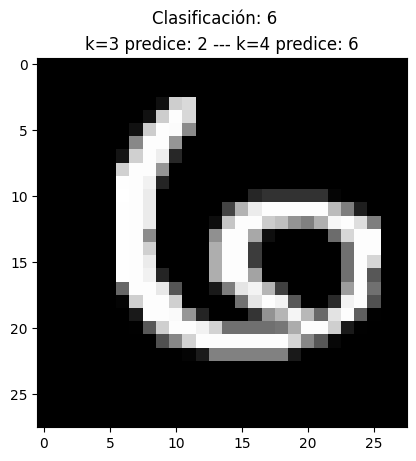

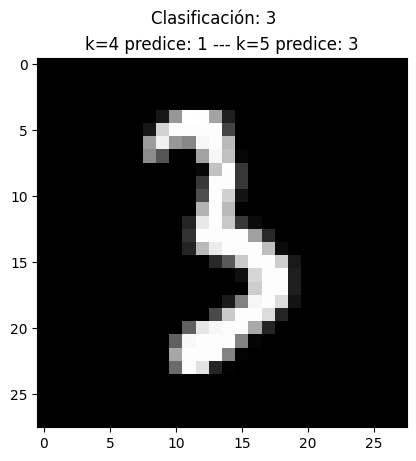

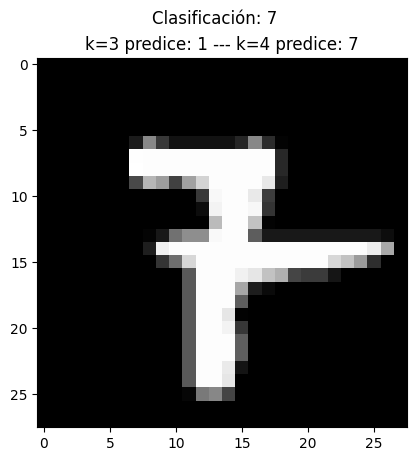

None


In [ ]:
#graficamos algunos casos

def hallar_desaciertos_vs_aciertos(todas_Ui, test, k1, k2):
  #devuelve un array con las posiciones de las predicciones que erraron para k1 y acertaron para k2
  expected = np.array(test.iloc[:, 0])
  hallados = []
  for i in range(200):
    vector_img = test.iloc[i, 1:]
    prediccion_k1 = i_menor_residuo(todas_Ui, vector_img, k1)
    if (prediccion_k1 != expected[i]):
      prediccion_k2 = i_menor_residuo(todas_Ui, vector_img, k2)
      if (prediccion_k2 == expected[i]):
        hallados.append(i)

  return hallados

def graficar_desaciertos_vs_aciertos(todas_Ui, test, cant_graficos):
  #grafica al azar casos donde un k1 haya errado y k2 acertado, con k1<k2
  for j in range(cant_graficos):
    #elegir los k, al azar
    k1 = np.random.randint(1, 5)
    k2 = np.random.randint(k1+1, 6)
    hallados = hallar_desaciertos_vs_aciertos(todas_Ui, test, k1, k2)

    #elegir qué caso graficar
    index = np.random.choice(hallados)  #elige un caso al azar
    clasificacion = test.iloc[index, 0]
    vector_img = test.iloc[index, 1:]
    prediccion_k1 = i_menor_residuo(todas_Ui, vector_img, k1)
    prediccion_k2 = i_menor_residuo(todas_Ui, vector_img, k2)

    #graficar
    imagen = de_fila_a_matriz(test.iloc[index])
    plt.imshow(imagen, cmap = 'gray')
    plt.suptitle('Clasificación: ' + str(clasificacion))
    plt.title('k='+str(k1)+' predice: '+str(prediccion_k1)+' --- k='+str(k2)+' predice: '+str(prediccion_k2))
    plt.show()
    plt.close
  return

print(graficar_desaciertos_vs_aciertos(todas_Ui, test200, 3))

> Como la precisión de valores de $k$ más altos es mayor, en general los casos donde ${k}_{1}$ falló y ${k}_{2}$ acertó cumplen ${k}_{1}< {k}_{2}$. (Cabe aclarar que esto no es cierto para todos los casos, pero si la mayoría). Por eso, decidimos graficar algunos casos al azar donde se cumplen esas condiciones.

> Dado que la precición de $k=1$ es buena, y sólo se pone mejor a medida que $k$ aumenta, la mayoría de los casos que la función ```graficar_desaciertos_vs_aciertos``` nos muestra confunden números que son parecidos entre ellos, como el 1 con el 7 o el 9 con el 4. Para muchos casos, además, considerar sólo una columna más de $U$ es suficiente para rectificar el error.

